#### Full name: Hanan ATMANI                                                   

### TP1 Numerical Linear Algebra

In [3]:
import numpy as np
import scipy.linalg
import timeit
import matplotlib.pyplot as plt
import time

### Exercice 1
Let $A$ be a matrix in $\mathbb{R}^{n \times n}$.
$$
A = \begin{bmatrix}
2 & -1 & 0 & \dots & 0 & 0 \\
-1 & 2 & -1 & \dots & 0 & 0 \\
0 & -1 & 2 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \dots&1 & 2 &-1 \\
0 & 0 & 0 & \dots & -1 & 2
\end{bmatrix}
$$
Is the matrix $A$ positive definite, or is it positive semi-definite?

The matrix $A$ is symmetric, meaning $A = A^T$. To verify this, we use the following Python code. Then, we apply Sylvester's criterion to demonstrate that it is positive definite. This involves computing the determinants of all principal submatrices of $A$ and observing the signs of these determinants. If all determinants are strictly positive, we conclude that $A$ is a symmetric positive definite matrix. 

In [2]:
# Declaration of matrix A
N = 5
inf = -1 * np.ones(N - 1)
sup = -1 * np.ones(N - 1)
diago = 2 * np.ones(N)
A = np.diag(inf, -1) + np.diag(diago, 0) + np.diag(sup, 1)

# Extraction of principal submatrices of A
def extract_principal_submatrices(matrix):
    n = len(matrix)
    principal_submatrices = []

    for i in range(1, n + 1):
        principal_submatrix = matrix[:i, :i]
        principal_submatrices.append(principal_submatrix)

    return principal_submatrices

# Function to compute determinants of submatrices of A
def determinant_submatrix(submatrix):
    determinants = []
    for i in submatrix:
        d = np.linalg.det(i)
        determinants.append(d)
    return determinants

# Test for sign of determinants
def test_positive(array):
    count = 0
    for i in array:
        if i <= 0:
            count += 1
    if count == 0:
        print('The matrix A is positive definite.')
    else:
        print('The matrix A  is not positive definite.')

# Apply to our matrix A
## Checking for symmetry
A_transpose = np.transpose(A)
if np.array_equal(A, A_transpose):
    print("The matrix A is symmetric.")
    test_positive(determinant_submatrix(extract_principal_submatrices(A)))
else:
    print("Matrix A must be symmetric.")


The matrix A is symmetric.
The matrix A is positive definite.


In [ ]:
!pip install scipy

Write a Python script to solve a linear system associated with the above matrix.
According to the preceding question, since $A$ is a symmetric positive definite matrix, it follows that $A$ admits an LU decomposition, i.e., $\exists! (L,U)$ where $L$ is a lower triangular matrix with ones on the diagonal and $U$ is an upper triangular matrix such that:
$$ A = LU$$

In [3]:

# LU decomposition of matrix A
P, L, U = scipy.linalg.lu(A)

# Displaying matrices L and U
print("Matrix L (lower) :\n", L)
print("\nMatrix U (upper) :\n", U)

Matrix L (lower) :
 [[ 1.          0.          0.          0.          0.        ]
 [-0.5         1.          0.          0.          0.        ]
 [ 0.         -0.66666667  1.          0.          0.        ]
 [ 0.          0.         -0.75        1.          0.        ]
 [ 0.          0.          0.         -0.8         1.        ]]

Matrix U (upper) :
 [[ 2.         -1.          0.          0.          0.        ]
 [ 0.          1.5        -1.          0.          0.        ]
 [ 0.          0.          1.33333333 -1.          0.        ]
 [ 0.          0.          0.          1.25       -1.        ]
 [ 0.          0.          0.          0.          1.2       ]]


Now, let's solve the system $AX=b$. <br>
Suppose that the vector $b$ is defined as $b = (1,1,...,1)^T$. <br>
Since we know that $A=LU$, the system can be rewritten as follows: $$LUX=b$$ 
Firstly, we will solve the lower triangular system $$LY=b$$ 
 Then the upper triangular system $$UX=Y.$$

In [4]:
## System solution
b = np.ones(N)
X = np.zeros(N)
Y = np.zeros(N)

## 1 Solving Ly = b for lower triangular
Y[0] = b[0] / L[0][0]
for i in range(1, N):
    s = 0
    for j in range(0, i):
        s += L[i][j] * Y[j]
    Y[i] = (b[i] - s) / L[i][i]

## 2 Solving UX = Y for upper triangular
X[N-1] = Y[N-1] / U[N-1][N-1]
for i in range(N-2, -1, -1):
    s = 0
    for j in range(i+1, N):
        s += L[i][j] * X[j]
    X[i] = (Y[i] - s) / U[i][i]

print(" solution of AX=b",X)


 solution of AX=b [0.5 1.  1.5 2.  2.5]


## Exe2
Consider the following boundary value problem modeling the heat flow in
a long pipe:
$$
(2) = \left\{
    \begin{array}{ll}
        y"(x) -p(x)y'(x)-q(x)y(x)= r(x) & \forall x \in [a,b] \\
        y(a)=\alpha, y(b)=\beta
    \end{array}
\right.
$$
Let $N$ be the number of nodes $(x_i)_{1\leq i \leq N}$. <br>
Then, the step size is given by $h=\frac{b-a}{N-1}$, with $x_1=a$ and $x_N=b$.
 Also, let $y(x_i)=y_i$, so $y(x_1)=y_1=\alpha$ and $y(x_N)=y_N=\beta$<br>
Let's use the limiting process to find the approximations of $y_i"$ et $y'_i$:
$$y_i"\approx \frac{y_{i+1}-2y_i+y_{i-1}}{h^2}$$
 et $$y'_i\approx \frac{y_i+y_{i-1}}{h}$$
In substituting into equation (2), we find the described problem as follows:
 $$y_{i+1} - y_i(2+p_ih+q_ih^2) +y_{i-1}(1+p_ih)= r_ih^2,  2\leq i\leq N-1$$
 Finally, we obtain the following system: $$Ay=b$$ with
$$A = \begin{bmatrix}
-(2+p_2h +q_2h^2) & 1 & 0 & \dots & 0 & 0 \\
1+hp_3& -(2+p_3h +q_3h^2)  & 1 & \dots & 0 & 0 \\

\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \dots (1+hp{N_2})& -(2+p_{N-2}h +q_{N-2}h^2)  & 1 \\
0 & 0 & 0 & \dots & (1+hp_{N-1}) & -(2+p_{N-1}h +q_{N-1}h^2) 
\end{bmatrix}
$$
and $$y=\begin{bmatrix}
y_2\\
y_3\\
\vdots\\
y_{N-1}
\end{bmatrix}$$
and $$b=\begin{bmatrix}
r_2h^2-\alpha(1+hp_2)\\
r_3h^2\\
r_4h^2
\vdots\\
r_{N-2}h^2\\
r_{N-1}*h^2-\beta
\end{bmatrix}$$
 

In [4]:
# SETTING
N = 10
a_x = 0
b_x = 1
alpha = 0
beta = 0
p = lambda x: 0*x
q = lambda x: 0*x
r = lambda x: -np.exp(x) + x - 1

# MODELING 
h = (b_x - a_x) / (N-1)
h_x = np.linspace(a_x, b_x, N)

# Construct b
b = r(h_x[1:N-1])*(h**2)
b[0] -= alpha*(1 + h * p(h_x[1]))
b[-1] -= beta

# Construct A
sup = np.ones(N - 3)
diago = -2 -(p(h_x[1:N-1])*h) - (q(h_x[1:N-1])*(h**2))
inf = 1 + h*p(h_x[2:N-1])
A = np.diag(inf, -1) + np.diag(diago, 0) + np.diag(sup, 1)

# Display
print(A)
print(b)

[[-2.  1.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.]]
[-0.02477047 -0.02502008 -0.02546024 -0.02611332 -0.02700436 -0.02816133
 -0.02961546 -0.03140169]


### (b) Solve the linear system using the Gaussian elimination method

In [40]:
def gauss(A, b):
    A = np.copy(A)
    b = np.copy(b)
    n = len(b)
    x = np.zeros(n)

    for k in range(0, n-1):
        # Let's find maximum pivot in column k
        row_with_max_pivot = k
        for i in range(k + 1, n):
            if abs(A[i, k]) > abs(A[row_with_max_pivot, k]):
                row_with_max_pivot = i
        
        A[[k, row_with_max_pivot]] = A[[row_with_max_pivot, k]]
        b[k], b[row_with_max_pivot] = b[row_with_max_pivot], b[k]

        if A[k][k] == 0:
            return np.zeros(n)

        # Let's transform the system into an upper triangular matrix.
        for i in range(k + 1, n):
            pivot = A[i, k] / A[k, k]
            for j in range(k, n):
                A[i, j] -= pivot * A[k, j]
            b[i] -= pivot * b[k]
            
    # Solving, let compute x
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x

In [41]:
# TEST ON GAUSS
X = gauss(A, b)
X = np.insert(X, 0, alpha)
X = np.append(X, beta)
print(X)

[0.         0.10441849 0.1840665  0.23869444 0.26786214 0.27091652
 0.24696653 0.19485522 0.11312846 0.        ]


### (c) Solve the linear system using QR-factorization.

In [42]:
def gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i].T, A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    return Q, R

def QR(A,b,alpha,beta):
    Q, R = gram_schmidt(A)
    N = A.shape[0]

    # Résolution de Qy = b (triangulaire inférieure)
    Y = np.dot(Q.T, b)
    
    # Résolution de RX = Y (triangulaire supérieure)
    X = np.zeros(N)
    X[-1] = Y[-1] / R[-1, -1]
    for i in range(N - 2, -1, -1):
        s = 0
        for j in range(i + 1, N ):
            s += R[i][j] * X[j]
        X[i] = (Y[i] - s) / R[i][i]
    
    X = np.insert(X, 0, alpha)
    X = np.append(X, beta)
    return X

In [28]:
#test of QR
x=QR(A,b,alpha,beta)
print(x)

[0.         0.10441849 0.1840665  0.23869444 0.26786214 0.27091652
 0.24696653 0.19485522 0.11312846 0.        ]


### (d) Solve the linear system using SVD-decomposition.

In [7]:
def SVD(A,b,alpha,beta):
    N=A.shape[0]
    U, Sigma, VT = np.linalg.svd(A, full_matrices=True)
    S=np.diag(Sigma)
    UT=np.transpose(U)
    V= np.transpose(VT)
    UT_b = np.dot(UT, b) 

    Y=np.zeros(N)
    Y[0] = UT_b[0] / S[0, 0]
    for i in range(1, N):
        s = 0
        Y[i] = (b[i] - np.dot(A[i, s-1:i], Y[s-1:i])) / A[i, i]
        
    X= np.dot(V,Y)
    X = np.insert(X, 0, alpha)
    X = np.append(X, beta)
    return X

In [8]:
#test SVD
x= SVD(A,b,alpha,beta) 
print(x)

[ 0.          0.00147549 -0.01455933  0.00525144  0.00582611  0.00830205
  0.02844337  0.00517249 -0.01245092  0.        ]


### (e) Compare the three methods.

In [46]:
# TEST ON GAUSS
tab = [5, 8, 12, 20, 28, 30,40,45]
tim_GA=[]

for N in tab:
    # MODELING 
    h = (b_x - a_x) / (N-1)
    h_x = np.linspace(a_x, b_x, N)

    # Construct b
    b = r(h_x[1:N-1])*(h**2)
    b[0] -= alpha*(1 + h * p(h_x[1]))
    b[-1] -= beta

    # Generate A
    sup = np.ones(N - 3)
    diago = -2 -(p(h_x[1:N-1])*h) - (q(h_x[1:N-1])*(h**2))
    inf = 1 + h*p(h_x[2:N-1])
    A = np.diag(inf, -1) + np.diag(diago, 0) + np.diag(sup, 1)

    # Start time
    start_time = time.time()
    X = gauss(A, b)
    X = np.insert(X, 0, alpha)
    X = np.append(X, beta)

    # End time
    end_time = time.time()
    elapsed_time = end_time - start_time
    tim_GA.append(elapsed_time)

In [47]:
# TEST ON GAUSS
tim_QR=[]

for N in tab:
    # MODELING 
    h = (b_x - a_x) / (N-1)
    h_x = np.linspace(a_x, b_x, N)

    # Construct b
    b = r(h_x[1:N-1])*(h**2)
    b[0] -= alpha*(1 + h * p(h_x[1]))
    b[-1] -= beta

    # Generate A
    sup = np.ones(N - 3)
    diago = -2 -(p(h_x[1:N-1])*h) - (q(h_x[1:N-1])*(h**2))
    inf = 1 + h*p(h_x[2:N-1])
    A = np.diag(inf, -1) + np.diag(diago, 0) + np.diag(sup, 1)

    # Start time
    start_time =time.time()
    X= QR(A,b,alpha,beta)

    # End time
    end_time = time.time()
    elapsed_time = end_time - start_time
    tim_QR.append(elapsed_time)

In [48]:
# TEST ON GAUSS
tim_SV=[]

for N in tab:
    # MODELING 
    h = (b_x - a_x) / (N-1)
    h_x = np.linspace(a_x, b_x, N)

    # Construct b
    b = r(h_x[1:N-1])*(h**2)
    b[0] -= alpha*(1 + h * p(h_x[1]))
    b[-1] -= beta

    # Generate A
    sup = np.ones(N - 3)
    diago = -2 -(p(h_x[1:N-1])*h) - (q(h_x[1:N-1])*(h**2))
    inf = 1 + h*p(h_x[2:N-1])
    A = np.diag(inf, -1) + np.diag(diago, 0) + np.diag(sup, 1)

    # Start time
    start_time = time.time()
    X= SVD(A,b,alpha,beta) 

    # End time
    end_time = time.time()
    elapsed_time = end_time - start_time
    tim_SV.append(elapsed_time)

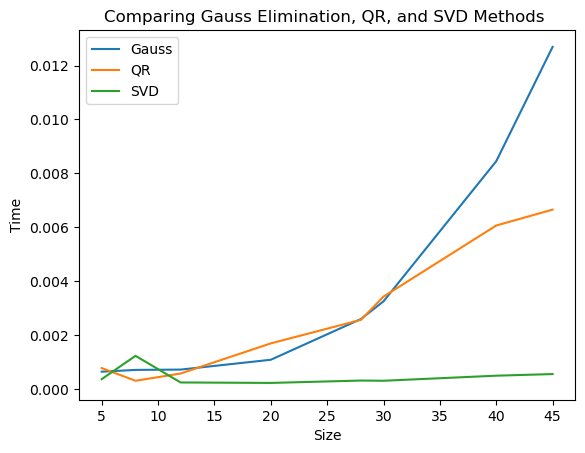

In [49]:

plt.plot(tab, tim_GA, label='Gauss')
plt.plot(tab, tim_QR, label='QR')
plt.plot(tab, tim_SV, label='SVD')

# Ajouter des titres et des légendes
plt.title('Comparing Gauss Elimination, QR, and SVD Methods ')
plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()

# Afficher le graphique
plt.show()


### Interpretation
The time consumed by the Gauss method to solve a linear system is typically very high. Following QR decomposition, the time required is moderate. However, the SVD method is considered the most optimal for solving a linear system, providing the shortest execution times on a simple graph."

### Exercice3
Solve the problem of fitting a polynomial $ p(x) = \sum_{i=0}^{d} c_i x^i $ of degree $ d $ to data points $ (x_i, y_i) $, $ i = 1, \ldots, m $, in the plane using the method of normal equations and QR decomposition. Choose the degree of the polynomial to be $ d = 5 $, then $ d = 15 $, choose the interval $ x \in [-1, 1] $, discretize it using $ N = 10 $ or $ N = 20 $ points.
### Solution
Firstly, discretize the interval $ [-1,1] $ into $ N $ nodes $ (x_i)_{1\leq i\leq N} $ with a step $ h=\frac{2}{N-1} $.<br>
 For each $ x_i $, compute $ p(x_i) = \sum_{j=0}^{d} c_j x_{i}^{j} = b_i $ with $ b_i = f(x_i) $<br>
  where $ f(x) = \sin(\pi\frac{x}{3}) + x^9 + x^7 $ is the function we seek to approximate with a polynomial.
<br>
Then, solve a system of equations of the form:
$$\begin{bmatrix}
1 & x_1 & x_1^2 & \dots &  x_1^d \\
1 & x_2 & x_2^2 & \dots &  x_2^d \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \dots &  x_N^d  
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
\vdots \\
c_d
\end{bmatrix}
=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_N
\end{bmatrix}
$$

Next, perform the QR decomposition of the matrix $ A $, where $ A $ is the coefficient matrix of the system.<br>
$$A = QR$$

Finally, use the normal equations to find the polynomial coefficients:
$$C = R^{-1}Q^Tb$$
In the code, I used the function $$ f(x) = \sin\left(\frac{\pi x}{3}\right) + \sin(8x).$$


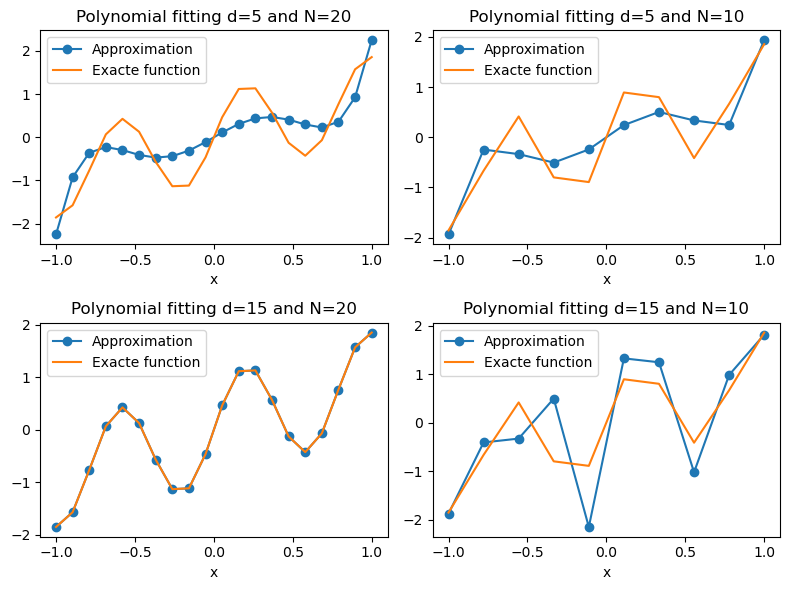

In [50]:
#Exe3
#les bornes
a= -1
b_x=1
#la fonction f(x)
def f(x):
    return np.sin(np.pi*x/3) + np.sin(8*x)
#la fonction qui décompose A a A=QR
def gram_schmidt(A):
        m, n = A.shape
        Q = np.zeros((m, n))
        R = np.zeros((n, n))
        for j in range(n):
            v = A[:, j]
            for i in range(j):
                R[i, j] = np.dot(Q[:, i].T, A[:, j])
                v = v - R[i, j] * Q[:, i]
            R[j, j] = np.linalg.norm(v)
            Q[:, j] = v / R[j, j]
        return Q, R
#trouver le coeffecients de polynome
def fitting_polynomial(N,d):
    h= (b_x - a)/(N-1)
    x=np.array([i*h +a for i in range(N)])
    C= np.zeros(d+1)
  
    b =[f(i) for i in x]
    A =np.zeros((N,d+1))
    for i in range(d+1):
        A[:,i]= x**i
    #Q, R = np.linalg.qr(A)
    Q,R= gram_schmidt(A)
    #Q, R = np.linalg.qr(A, mode='reduced')
    R_inverse = np.linalg.inv(R)
    QT=np.transpose(Q)
    C= np.dot(R_inverse,np.dot(QT,b))
    return x,C
#la forme de polunome
def pol(c,x):
    s=0
    for i in range(len(c)):
        s= s+c[i]*x**i
    return s
#d= degrée de polynome
tab_d=[5,15]
#N= le nombre des noeuds
tab_N=[ 20,10]

#la bocle pour les plotes pour chaques (d,N)
plt.figure(figsize=(8, 6))
pos = 1
for i in tab_d:
    for j in tab_N:
        x,c= fitting_polynomial(j,i)
        p= [pol(c,i) for i in x]
        y= [f(i) for i in x]

        plt.subplot(2, 2, pos)
        plt.plot(x, p, 'o-', label='Approximation')
        plt.plot(x, y, label='Exacte function')

        # Ajouter des titres et des légendes
        plt.title(f'Polynomial fitting d={i} and N={j}')
        plt.xlabel('x')
        plt.ylabel('')
        plt.legend()
        plt.tight_layout()
        pos += 1

# Afficher le graphique
plt.show()

#### Interpretation
le degre de polynome est le nombre des noeuds est grand la présision de modele aproximer est augmonte l'approximation polynomiale est proche de la fonction

### Exercice4
(a) Explain how Singular Value Decomposition (SVD) can be applied to compress color
images. Discuss the process in the context of an RGB image.
(b) Given a color image, implement an SVD-based compression algorithm in Python. Your
implementation should:
 Load a color image and separate it into R, G, and B channels.
 Apply SVD to each channel and reconstruct the image using only the first k sin-
gular values and vectors.
 Display the original and compressed images side by side for comparison, and com-
pute the compression ratio.
(c) Analyze the effect of varying the number of singular values (k ) on the compression
ratio and image quality. Use a specific color image for this analysis and provide visual
and numerical results for at least three different values of k. Discuss the trade-off
between compression ratio and image quality.
### Solution 
(a)  Singular Value Decomposition (SVD) can compress RGB images by reducing the dimensionality of pixel matrices. After converting the RGB image into a matrix, SVD decomposes this matrix into three matrices. Subsequently, a portion of singular values and singular vectors is truncated to reduce data size while retaining essential visual information. Finally, the compressed image is reconstructed from the truncated matrices, thereby preserving significant visual features.

(b)

<function matplotlib.pyplot.show(close=None, block=None)>

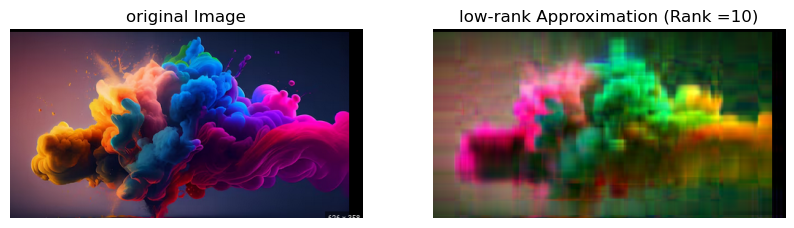

In [51]:
from PIL import Image
#load the image
image_path="IMAGE.jpg"
image = Image.open(image_path)
image_col= image.convert("RGB")
image_array=np.array(image_col)
red_channel = image_array[:, :, 0]
blue_channel= image_array[:,:,1]
green_channel= image_array[:, :, 2]
#perform singular value decomposition (SVD) for each color channel
U_red, S_red, V_red = np.linalg.svd(red_channel)
U_green, S_green, V_green = np.linalg.svd(green_channel)
U_blue, S_blue, V_blue = np.linalg.svd(blue_channel)
#est the rank for low-rank approximation 
rank = 10
#Reconstruct the color  channels with low-rank approximation 
red_approximation= np.dot(U_red[:,: rank], np.dot(np.diag(S_red[:rank]),V_red[:rank,:]))
green_approximation= np.dot(U_green[:,: rank], np.dot(np.diag(S_green[:rank]),V_green[:rank,:]))
blue_approximation= np.dot(U_blue[:,: rank], np.dot(np.diag(S_blue[:rank]),V_blue[:rank,:]))

 # Combine the color channels
approximation = np.stack((red_approximation, green_approximation, blue_approximation), axis=-1)

    # Rescale the approximation to [0, 255] and convert to uint8
approximation = np.clip(approximation, 0, 255).astype(np.uint8)

    # Create image from array
approximation_image1 = Image.fromarray(approximation)
#Approximation_image.save("approximation_image1.jpg")
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(approximation_image1)
plt.title(f'low-rank Approximation (Rank ={rank})')
plt.axis('off')
plt.show

(c)

Rank= 1


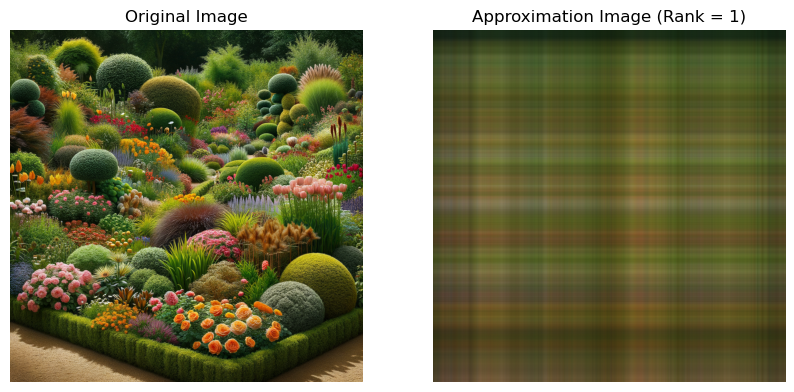

Rank= 10


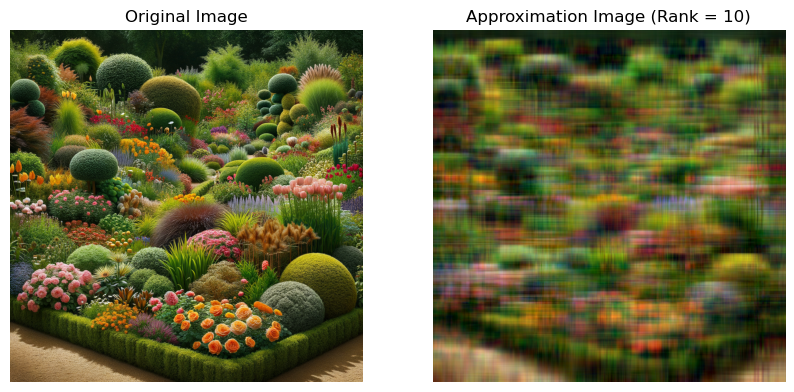

Rank= 40


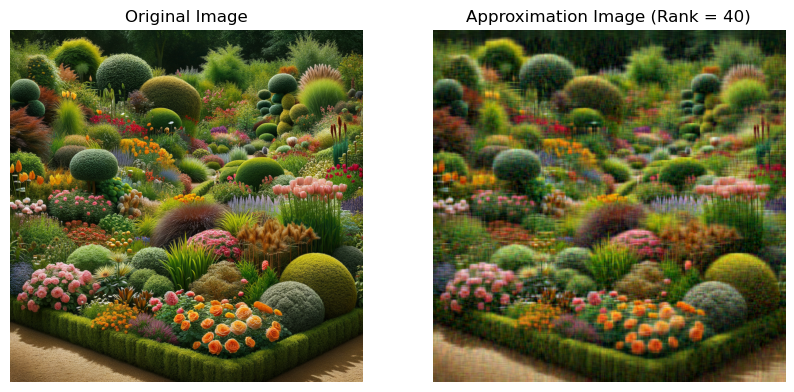

Rank= 50


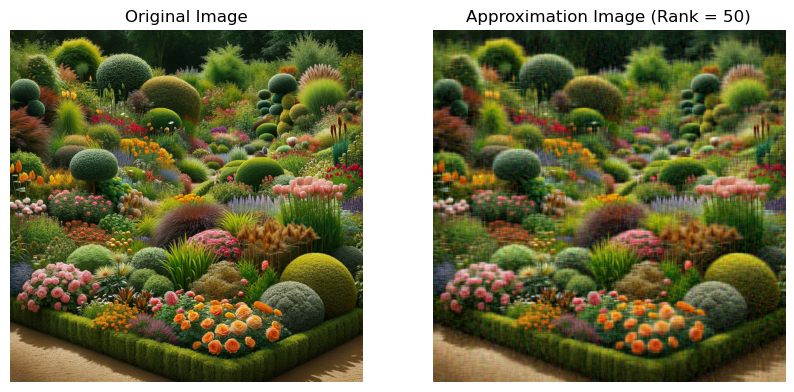

Rank= 70


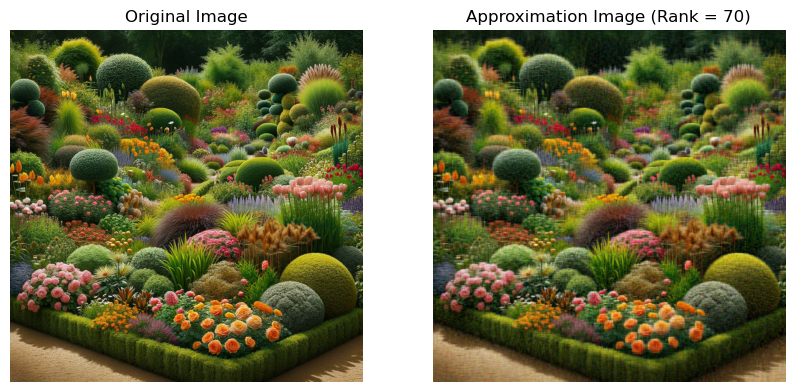

Rank= 80


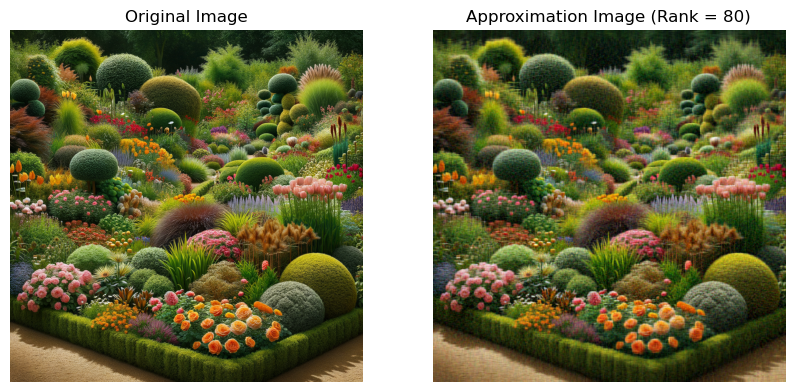

Rank= 100


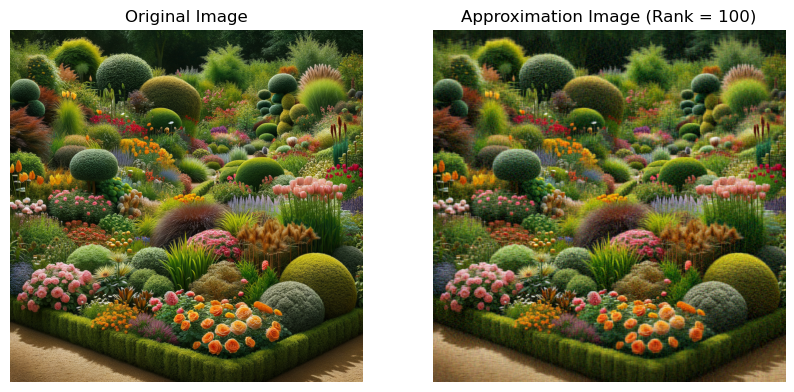

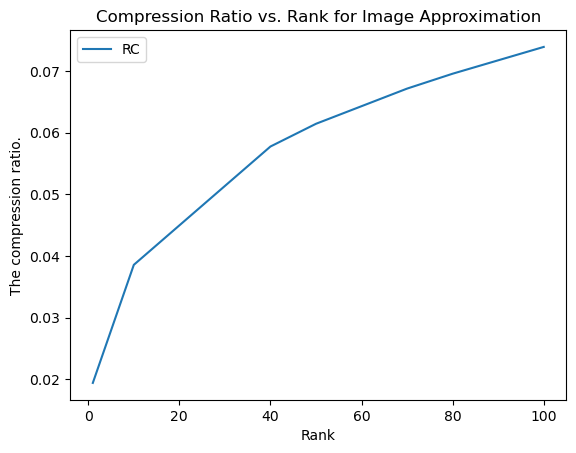

In [52]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
# Load the image
image_path = "tp1.jpg"
image = Image.open(image_path)
taille_image = os.path.getsize(image_path)
image_col = image.convert("RGB")
image_array = np.array(image_col)

# Separate the color channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]
# Perform singular value decomposition (SVD) for each color channel
U_red, S_red, V_red = np.linalg.svd(red_channel)
U_green, S_green, V_green = np.linalg.svd(green_channel)
U_blue, S_blue, V_blue = np.linalg.svd(blue_channel)

# Set the rank for low-rank approximation
tab_rank=[1,10, 40,50,70,80,100]
RC=[]
for rank in tab_rank:
    # Reconstruct the color channels with low-rank approximation
    red_approximation = np.dot(U_red[:, :rank], np.dot(np.diag(S_red[:rank]), V_red[:rank, :]))
    green_approximation = np.dot(U_green[:, :rank], np.dot(np.diag(S_green[:rank]), V_green[:rank, :]))
    blue_approximation = np.dot(U_blue[:, :rank], np.dot(np.diag(S_blue[:rank]), V_blue[:rank, :]))

    # Combine the color channels
    approximation = np.stack((red_approximation, green_approximation, blue_approximation), axis=-1)

    # Rescale the approximation to [0, 255] and convert to uint8
    approximation = np.clip(approximation, 0, 255).astype(np.uint8)

    # Create image from array
    approximation_image = Image.fromarray(approximation)
    approximation_image.save("approximation_image.jpg")

   # Calcul de la taille de l'image d'approximation
    taille_image_approximation = os.path.getsize("approximation_image.jpg")
    RC.append(taille_image_approximation/taille_image)

    # Display the images
    print(f'Rank=',rank)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(approximation_image)
    plt.title(f'Approximation Image (Rank = {rank})')
    plt.axis('off')
    plt.show()

plt.plot(tab_rank, RC, label='RC')

# Ajouter des titres et des légendes
plt.title('Compression Ratio vs. Rank for Image Approximation')
plt.xlabel('Rank')
plt.ylabel('The compression ratio.')
plt.legend()
# Afficher le graphique
plt.show()

As $k$ increases, more singular values are considered in the image reconstruction, leading to a better approximation of the original image. This increase in rank allows for capturing more detailed information from the image, resulting in higher visual quality of the compressed image. Thus, the analysis indicates that for higher values of kk, the quality of the compressed image improves, while the compression ratio decreases, as a larger amount of data is needed to accurately represent the image. This underscores the importance of carefully selecting the value of kk based on the specific quality and compression requirements of each application.

### Exercice5
5. [20 MARKS] Consider the biharmonic equation
$$
\Delta^2 u(s, t):=\Delta(\Delta u(s, t))=f(s, t) \quad(s, t) \in \Omega,
$$
with
$$
u(s, t)=0, \quad \Delta u(s, t)=0 \quad(s, t) \in \partial \Omega .
$$

Here $\Omega$ is the open unit square. The condition $\Delta u=0$ is called the Navier boundary condition. Moreover,
$$
\Delta^2 u=u_{x x x x}+2 u_{x x y y}+u_{y y y y} .
$$
a) Let $v=-\Delta u$. Show that 3 can be written as a system
$$
\begin{aligned}
-\Delta v(s, t) & =f(s, t) \quad(s, t) \in \Omega \\
-\Delta u(s, t) & =v(s, t) \quad(s, t) \in \Omega \\
u(s, t) & =v(s, t)=0 \quad(s, t) \in \partial \Omega .
\end{aligned}
$$
b) Discretizing with $T=\operatorname{tridiag}(-1,2,-1) \in \mathbb{R}^{m \times m}, h=\frac{1}{m+1}$, and $F=(f(j h, k h))_{j, k=1}^m$ we get two matrix equations
$$
T V+V T=h^2 F, \quad T U+U T=h^2 V .
$$
### Solution
(a) Let $v=-\Delta^2u(s,t)$. 
We have
\begin{equation}
(3)  \Delta^2 u(s, t)=\Delta(\Delta u(s, t))=f(s, t)
\end{equation}
Replacing $\Delta u$ by $v$ in (3), we obtain
\begin{equation}
\Delta(-v(s,t))=f(s, t) \quad \text{and} \quad -\Delta v=f(s, t).
\end{equation}
Also, $u(s, t)=\Delta(u(s, t))=0 \quad (s, t) \in \partial r$. Hence,
\begin{equation}
v(s, t)=-\Delta(u(s, t))=0 \quad \text{on} \quad \partial \Omega.
\end{equation}
Therefore, $v$ satisfies
\begin{align}
-\Delta v(s, t)&=f(s, t) \quad \text{in} \quad \Omega \\
-\Delta u(s, t)&=v(s, t) \quad \text{in} \quad \Omega \\
u(s, t)&=v(s, t)=0 \quad \text{on} \quad \partial \Omega.
\end{align}
(b) Let $\left(S_i, t_j\right)$ with $1 \leqslant i, j \leqslant m+2$. The methods use limited D in the following points $\left(s_{i+1}, t_j\right)$, $\left(s_{i-1}, t_j\right)$, $\left(s_i, t_{j+1}\right)$, and $\left(s_i, t_{j-1}\right)$. Let $v_{i, j}=V\left(s_i, t_j\right)$.

For $(s,t)\in \Omega$, we have
$$
-\frac{v_{i, 1, j}-2 v_{i, j}+v_{i-1, j}}{h^2}-\frac{v_{i, j+1}-2 v_{i, j}+v_{i, j-1}}{h^2}=j_{i, j}.
$$
Then $$T V+V T=h^2 F$$ with
$T=\text{tridiag}(-1,2,-1)$, 
$$
V=\begin{bmatrix}
v_{1,1} & v_{1,2} & \dots & v_{1,m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
v_{m,1} & v_{m,2} & \dots & v_{m,m} 
\end{bmatrix}
$$ 
and 
$$
F=\begin{bmatrix}
f_{1,1} & f_{1,2} & \dots & f_{1,m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
f_{m,1} & f_{m,2} & \dots & f_{m,m} 
\end{bmatrix}
$$

Second step: $V(s, t)=-\Delta u(s, t)$.
$$
-\frac{u_{i+1, j}-2 u_{i, j}+u_{i-1, j}}{h^2}-\frac{v_{i, j+1}-2 u_{i, j}+u_{i, j-1}}{h^2}=v_{i, j}.
$$
We encounter the same system as before:
$$TU + UT = h^2V.$$
with
$T=\text{tridiag}(-1,2,-1)$, 
$$
U=\begin{bmatrix}
u_{1,1} & v_{1,2} & \dots & u_{1,m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
u_{m,1} & u_{m,2} & \dots & u_{m,m} 
\end{bmatrix}
$$ 
and 
$$
V=\begin{bmatrix}
v_{1,1} & v_{1,2} & \dots & v_{1,m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
v_{m,1} & v_{m,2} & \dots & v_{m,m} 
\end{bmatrix}
$$
In the resolution I implemented in the code, I took $f(s,t)=s^2-ts+s^2$ and $\Omega=(]-3,3[)^2$.<br>
 To solve the two equations, I used the Kronecker product.<br>

For the first equation $TV + VT = h^2F$, this yields $AY=C$ with $A = T \otimes I + I \otimes T$, $Y=\text{vec}(V)$, and $C=\text{vec}(h^2F)$. <br>
Once we find $Y$, we proceed to solve the second equation $TU + UT=h^2V$, which becomes $AX=b$ with $A = T \otimes I + I \otimes T$, $X=\text{vec}(U)$, and $b=h^2Y$.


la solution de equation est [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00016726 0.00032881 ... 0.0004744  0.00024474 0.        ]
 [0.         0.00032881 0.00064738 ... 0.00092249 0.0004744  0.        ]
 ...
 [0.         0.0004744  0.00092249 ... 0.00064738 0.00032881 0.        ]
 [0.         0.00024474 0.0004744  ... 0.00032881 0.00016726 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


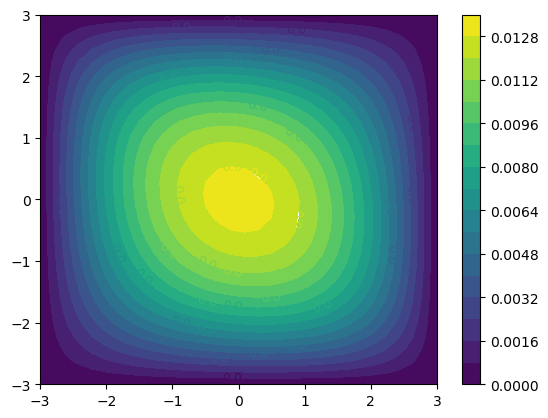

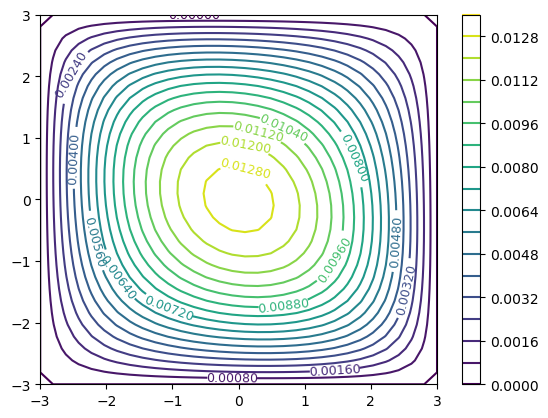

In [53]:
#exercice5
import numpy as np 
a = -3
b=3
m=30
h=1/(m+1)
x = np.linspace(a,b,m+2) 
y = np.linspace(a,b,m+2)
'''
def f(s,t):
    return np.sin(s**2+t**2)*np.exp(-s**2-t**2)
'''
def f(s,t):
    return s**2-s*t+t**2

inf = -1 * np.ones(m-1)
sup = -1 * np.ones(m-1)
diago = 2 * np.ones(m)

# Construction de la matrice tridiagonale A
T= np.diag(inf, -1) + np.diag(diago, 0) + np.diag(sup, 1)
U=np.zeros((m,m))
V=np.zeros((m,m))
V = V.T.flatten()
I=np.identity(m)
F=np.zeros((m,m))
A=np.kron(T,I) +np.kron(I,T)
for i in range(1,m+1):
    for j in range(1,m+1):
        F[i-1][j-1]=(h**2)*f(x[i],y[j])
F = F.T.flatten()
n = len(F)
V = np.linalg.solve(A, F)

#V=gauss(A, F)
V=(h**2)*V
A=np.kron(T,I) +np.kron(I,T)
n = len(V)
U = np.linalg.solve(A, V)

#U=gauss(A, V)
U =U.reshape(m, m)
U_glo=np.zeros((m+2,m+2))
U_glo[1:m+1,1:m+1] = U
print(f'la solution de equation est',U_glo)
graph=plt.contourf(x,y,U_glo,20) #graph=plt.contourf(x,y,T,20)
plt.clabel(graph,inline=1,fontsize=9,fmt='%3.1f')
plt.colorbar()
plt.show()
graph=plt.contour(x,y,U_glo,20)
plt.clabel(graph,inline=1,fontsize=9,fmt='%3.5f')
plt.colorbar()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

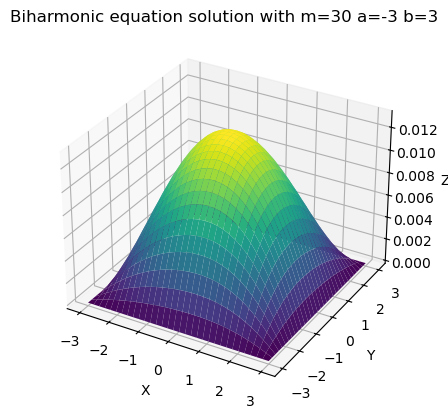

In [54]:
X, Y = np.meshgrid(x, y)     # Créer une grille de points pour x et y

# Calculer les valeurs de la fonction pour chaque point de la grille
Z = U_glo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U_glo, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Biharmonic equation solution with m={m} a={a} b={b}')
# Show the plot
plt.show
